## Introduction to the CMIP6 ERA5 data and the netCDF file format

The reanalysis data is stored in a common geo-spatial/array data format: [netCDF](https://www.unidata.ucar.edu/software/netcdf/). We'll use the Python package [netCDF4](https://unidata.github.io/netcdf4-python/#creatingopeningclosing-a-netcdf-file) to read and manipulate this format.

In [1]:
import netCDF4 as nc

We'll read in one of the ERA5 files for $\Psi$, the horizontal streamfunction (flux of wind velocity field), which is calculated from pressure level reanalysis data.

In [2]:
psifname = '/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.generated_psi/2018/psi_20180101.nc'  
psi2018 = nc.Dataset(psifname, 'r', format='NETCDF4')

Let's see what a [`netCDF4.Dataset`](https://unidata.github.io/netcdf4-python/#Dataset.__init__) object looks like.

In [3]:
print(psi2018, '\n')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): latitude(721), longitude(1440), time(24), level(32)
    variables(dimensions): float64 latitude(latitude), float64 longitude(longitude), int32 time(time), float64 level(level), float32 streamfunction(time, level, latitude, longitude)
    groups:  



The `.nc` file we read in is in [HDF5](https://docs.nersc.gov/development/libraries/hdf5/) format, so we could have used another package like [h5py](https://www.h5py.org/) to read it in. 

The dataset contains members `dimensions` and `variables`. It can also hold optional metadata in `__dict__`, but in this case it's empty.

In [4]:
print(f'{type(psi2018.__dict__)} with len: {len(psi2018.__dict__)}') # metadata dict
print(f'{type(psi2018.dimensions)} with len: {len(psi2018.dimensions)}') # dict
print(f'{type(psi2018.variables)} with len: {len(psi2018.variables)}') # dict

<class 'dict'> with len: 0
<class 'dict'> with len: 4
<class 'dict'> with len: 5


### Dimensions of the dataset

This file contains a 24-hour sequence of PSI measurements from New Year's day, 2018.

The spatiotemporal grid has the following dimensions: **24 (time) x 32 (level)  x 721 (latitude) x 1440 (longitude) **.

In [5]:
print(psi2018.dimensions.keys(), '\n')
for val in psi2018.dimensions.values():
    print(val, '\n')

dict_keys(['latitude', 'longitude', 'time', 'level']) 

<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 721 

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 1440 

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 24 

<class 'netCDF4._netCDF4.Dimension'>: name = 'level', size = 32 



### Variables in the dataset

The `variables` member is where the actual data can be found. Here we have the same keys as `dimensions`, plus a `'streamfunction'`.

In [6]:
print(psi2018.variables.keys(), '\n')

dict_keys(['latitude', 'longitude', 'time', 'level', 'streamfunction']) 



The values in the `variables` dict are [`netCDF4.Variable`](https://unidata.github.io/netcdf4-python/#Variable) objects. 

#### **Latitude and longitude**

Latitude and longitude do have metadata which can be accessed via `__dict__`, including a default missing data value (`nan`), long and short names, units, and --in the case of latitude -- a "qualifier".

In [7]:
print(psi2018.variables['latitude'], '\n')
print(psi2018.variables['latitude'].ncattrs(), '\n')
print(psi2018.variables['longitude'].__dict__, '\n')

<class 'netCDF4._netCDF4.Variable'>
float64 latitude(latitude)
    _FillValue: nan
    long_name: latitude
    short_name: lat
    units: degrees_north
    qualifier: Gaussian
unlimited dimensions: 
current shape = (721,)
filling on 

['_FillValue', 'long_name', 'short_name', 'units', 'qualifier'] 

{'_FillValue': nan, 'long_name': 'longitude', 'short_name': 'lon', 'units': 'degrees_east'} 



When a `Variable` holds non-scalar data, you can use slicing to access it. 

Latitude is in units of degrees north from -90 (south pole) to 90 (north pole) and is spaced at 0.25 degrees.

In [8]:
print(f"min. latitude: { psi2018.variables['latitude'][:].min() }\n")
print(f"max. latitude: {psi2018.variables['latitude'][:].max()}\n")
print(f"spacing of latitude values: {psi2018.variables['latitude'][0] - psi2018.variables['latitude'][1]}\n")

min. latitude: -90.0

max. latitude: 90.0

spacing of latitude values: 0.25



Note that the latitude data starts at 90 and ends at -90.

In [9]:
print(psi2018.variables['latitude'][0:5], '\n')
print(psi2018.variables['latitude'][-5:], '\n')

[90.   89.75 89.5  89.25 89.  ] 

[-89.   -89.25 -89.5  -89.75 -90.  ] 



Longitude, however, is in degrees east with units ranging from 0 (the 180th meridian in the Pacific Ocean) to 359.75, again with a spacing of 0.25 degrees.

In [10]:
print(psi2018.variables['longitude'], '\n')
print(f"min. longitude: { psi2018.variables['longitude'][:].min() }\n")
print(f"max. longitude: {psi2018.variables['longitude'][:].max()}\n")
print(f"spacing of longitude values: {psi2018.variables['longitude'][1] - psi2018.variables['longitude'][0]}\n")

<class 'netCDF4._netCDF4.Variable'>
float64 longitude(longitude)
    _FillValue: nan
    long_name: longitude
    short_name: lon
    units: degrees_east
unlimited dimensions: 
current shape = (1440,)
filling on 

min. longitude: 0.0

max. longitude: 359.75

spacing of longitude values: 0.25



#### **Time**

All `Variable` objects have useful members/methods like `dtype`, `dimensions`, `shape`, and `get_dims()`.

In [11]:
print(psi2018.variables['time'], '\n')
print(psi2018.variables['time'].dtype, '\n')
print(psi2018.variables['time'].dimensions, '\n')
print(psi2018.variables['time'].shape, '\n')
print(psi2018.variables['time'].get_dims(), '\n')

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    long_name: time
    units: hours since 1900-01-01
    calendar: gregorian
unlimited dimensions: 
current shape = (24,)
filling on, default _FillValue of -2147483647 used 

int32 

('time',) 

(24,) 

(<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 24,) 



#### **Level**

The `'level'` variable contains pressures at different vertical positions, in hectopascals = millibars. It can serve as a rough [proxy](https://www.weather.gov/source/zhu/ZHU_Training_Page/Miscellaneous/chart_comparison/chart_comparison.htm#COMPARISON) for height above sea level.

In [12]:
print(psi2018.variables['level'], '\n')
print(psi2018.variables['level'][0:], '\n')

<class 'netCDF4._netCDF4.Variable'>
float64 level(level)
    _FillValue: nan
    long_name: pressure level
    short_name: plev
    units: hPa
    alternate_units: millibar
unlimited dimensions: 
current shape = (32,)
filling on 

[  10.   20.   30.   50.   70.  100.  125.  150.  175.  200.  225.  250.
  300.  350.  400.  450.  500.  550.  600.  650.  700.  750.  775.  800.
  825.  850.  875.  900.  925.  950.  975. 1000.] 



In [13]:
print(dir(psi2018.variables['latitude']), '\n')

['_FillValue', '__array__', '__class__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__orthogonal_indexing__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', '__unicode__', '_assign_vlen', '_check_safecast', '_cmptype', '_enumtype', '_get', '_getdims', '_getname', '_grp', '_grpid', '_has_lsd', '_iscompound', '_isenum', '_isprimitive', '_isvlen', '_name', '_ncstring_attrs__', '_nunlimdim', '_pack', '_put', '_toma', '_use_get_vars', '_varid', '_vltype', 'always_mask', 'assignValue', 'chartostring', 'chunking', 'datatype', 'delncattr', 'dimensions', 'dtype', 'endian', 'filters', 'getValue', 'get_dims', 'get_var_chunk_cache', 'getncattr', 'group', 'long_name', 'mask', 'name', 'ncattrs', 'ndim', 'qualifier', 'renameAttribute

#### **Streamfunction** [\[1\]](https://glossary.ametsoc.org/wiki/Streamfunction), [\[2\]](https://en.wikipedia.org/wiki/Stream_function)

The `'streamfunction'` variable holds the actual data on the $24 \times 32 \times 721 \times 1440$ grid. 

Specifically, it represents an atmosphere horizontal streamfunction in units of $m^2 / s$, which has a corresponding ["standard name"](http://vocab.nerc.ac.uk/standard_name/) in this type of data.

"'Horizontal' indicates that the streamfunction applies to a horizontal velocity field on a particular vertical level." [\[src\]](http://vocab.nerc.ac.uk/standard_name/atmosphere_horizontal_streamfunction/). 

In [14]:
print(psi2018.variables['streamfunction'], '\n')
print(psi2018.variables['time'].dtype, '\n')

<class 'netCDF4._netCDF4.Variable'>
float32 streamfunction(time, level, latitude, longitude)
    _FillValue: nan
    units: m**2 s**-1
    standard_name: atmosphere_horizontal_streamfunction
    long_name: streamfunction
unlimited dimensions: 
current shape = (24, 32, 721, 1440)
filling on 

int32 



Here is the value of the streamfunction at midnight for a mid-atmosphere level: 

In [15]:
print(psi2018.variables['streamfunction'][0, 16, :, :], '\n')

[[-75026744. -75026744. -75026744. ... -75026744. -75026744. -75026744.]
 [-74999140. -74999470. -74999800. ... -74998150. -74998480. -74998820.]
 [-74959624. -74960390. -74961170. ... -74957310. -74958070. -74958850.]
 ...
 [ 63469830.  63467260.  63464708. ...  63477584.  63474980.  63472400.]
 [ 63763104.  63762096.  63761084. ...  63766180.  63765150.  63764132.]
 [ 63963560.  63963560.  63963560. ...  63963560.  63963560.  63963560.]] 



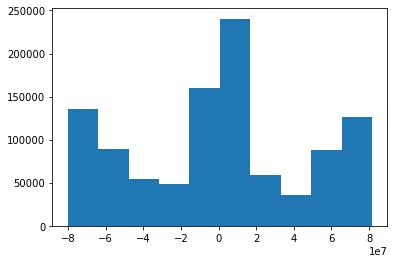

In [16]:
from matplotlib import pyplot as plt
plt.hist(psi2018.variables['streamfunction'][0, 16, :, :].flatten())
plt.show()

#### **Total precipitation**

Another variable calculated from reanalysis data is the total precipitation, also known as integrated water vapor transport (IVT).

In [17]:
tpfname = '/global/cfs/projectdirs/m3522/cmip6/ERA5/e5.generated_tp/ERA5_IVT_tp_reanalysis_2012.nc'  
tp2012 = nc.Dataset(tpfname, 'r', format='NETCDF4')

In [18]:
print(tp2012, '\n')

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2019-08-28 17:33:35 GMT by grib_to_netcdf-2.10.0: /opt/ecmwf/eccodes/bin/grib_to_netcdf -o /cache/data3/adaptor.mars.internal-1567012417.709491-5583-3-f8cdc368-3bff-4478-9269-ac9dfd0ba5b6.nc /cache/tmp/f8cdc368-3bff-4478-9269-ac9dfd0ba5b6-adaptor.mars.internal-1567012417.7104108-5583-2-tmp.grib
    dimensions(sizes): longitude(1440), latitude(721), time(8784)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 tp(time, latitude, longitude)
    groups:  



In [19]:
print(tp2012.variables['tp'], '\n')
print(tp2012.variables['time'], '\n')

<class 'netCDF4._netCDF4.Variable'>
int16 tp(time, latitude, longitude)
    scale_factor: 1.2109202976845874e-06
    add_offset: 0.03967701447393319
    _FillValue: -32767
    missing_value: -32767
    units: m
    long_name: Total precipitation
unlimited dimensions: 
current shape = (8784, 721, 1440)
filling on 

<class 'netCDF4._netCDF4.Variable'>
int32 time(time)
    units: hours since 1900-01-01 00:00:00.0
    long_name: time
    calendar: gregorian
unlimited dimensions: 
current shape = (8784,)
filling on, default _FillValue of -2147483647 used 



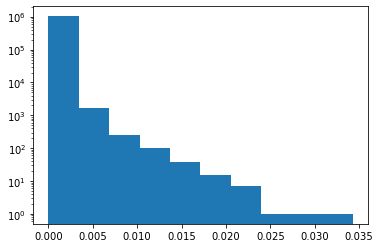

In [20]:
plt.hist(tp2012.variables['tp'][0, :, :].flatten())
plt.yscale('log')
plt.show()